<a href="https://colab.research.google.com/github/jorferr89/reconocimiento-rostro-ia/blob/main/HaarCascades_RodriguezJorgeFernando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de Rostros con Haar Cascades

## Preliminares

Empecemos importando las librerías que necesitaremos.

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Cargando la Imagen

Se carga la foto a color.

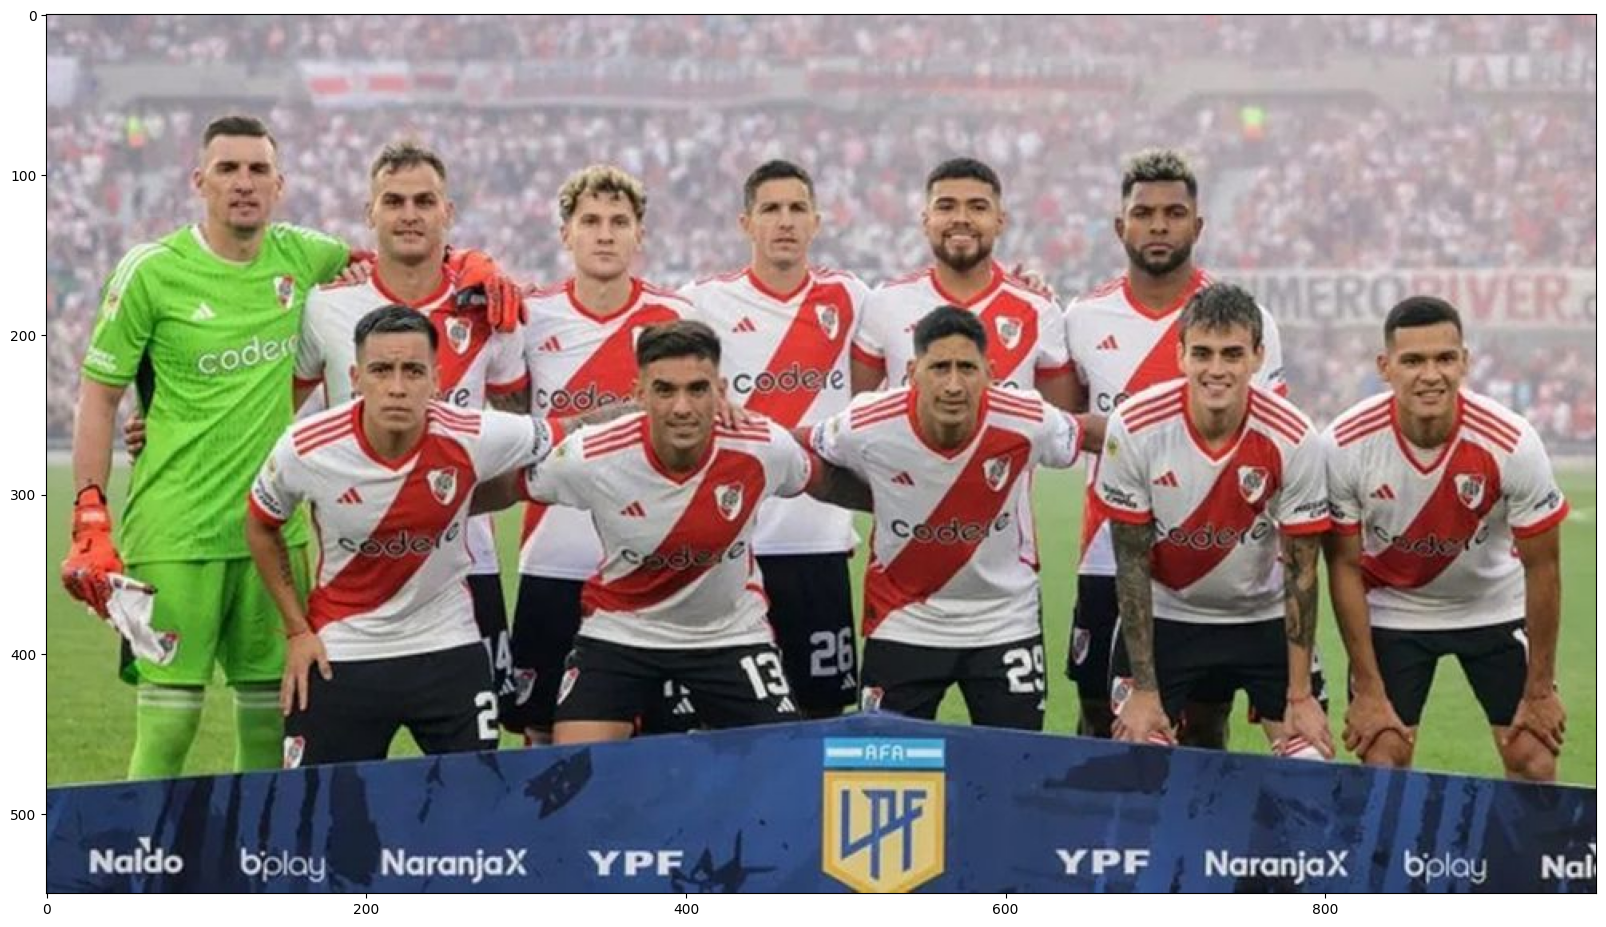

In [12]:
image = cv2.imread('imagen/river-equipo.jpg')

# Convierte a RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.imshow(image)

Se convierte la imagen a escala de grises.

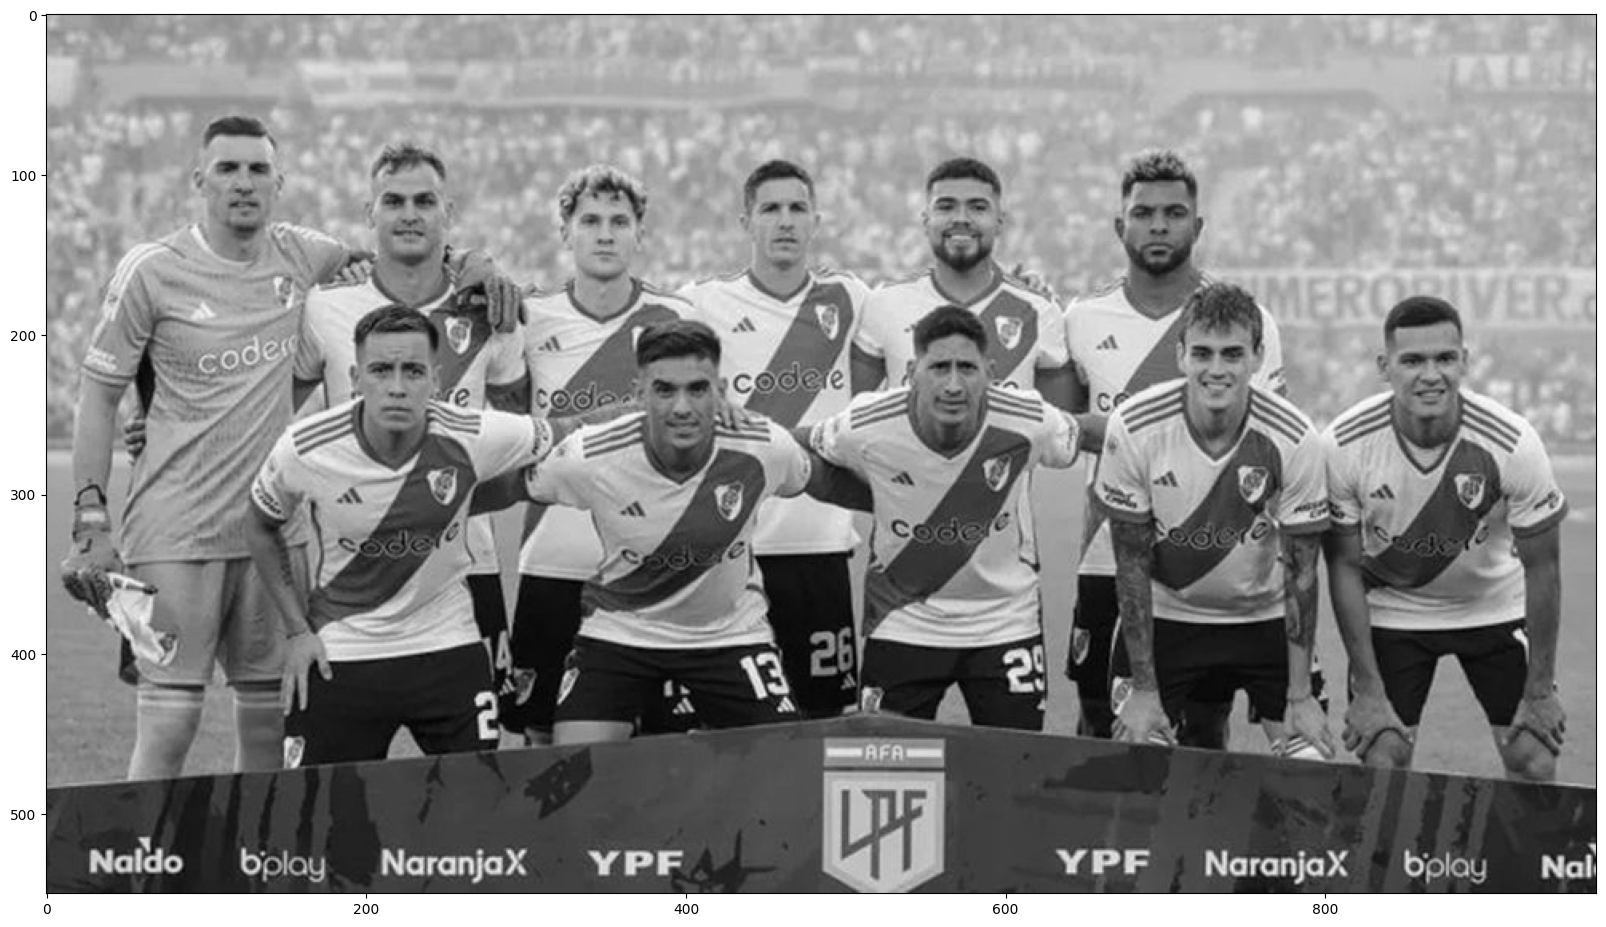

In [13]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20, 20))
plt.imshow(gray, cmap='gray')

## Cargando el Modelo Pre-Entrenado

Se carga un modelo pre-entrenado para detectar múltiples caras en una imagen. Los pesos y parámetros de este modelo están en el archivo `detector_architectures/haarcascade_frontalface_default.xml`.

Es importante mencionar que el número de rostros detectados está gobernado por la función `detectMultiScale` y sus entradas: `image`, `scaleFactor`, `minNeighbors`. Típicamente, con valores bajos de `scaleFactor` y `minNeighbors` podemos identificar más rostros, pero valores más altos tienden a producir mejores resultados.

In [14]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Ejecutar en la imagen en escala de grises.
faces = face_cascade.detectMultiScale(gray, 2, 1)

El clasificador nos devuelve un arreglo de recuadros delimitadores para cada cara encontrada en la imagen.

In [15]:
print(f'{len(faces)} rostros detectados.')
print('Coordenadas en el siguiente formato: (X, Y, width, height)')
print('=============================')
print(faces)

11 rostros detectados.
Coordenadas en el siguiente formato: (X, Y, width, height)
[[ 99  78  48  48]
 [203 100  48  48]
 [549 102  48  48]
 [439 104  48  48]
 [673 106  48  48]
 [325 111  48  48]
 [709 195  48  48]
 [844 198  48  48]
 [544 204  48  48]
 [197 205  48  48]
 [373 218  48  48]]


## Dibujando los Cuadros Delimitadores Alrededor de los Rostros Detectados

Se dibuja los cuadros que el algoritmo encontró encima de la imagen original para visualizar si dichas detecciones tienen sentido.

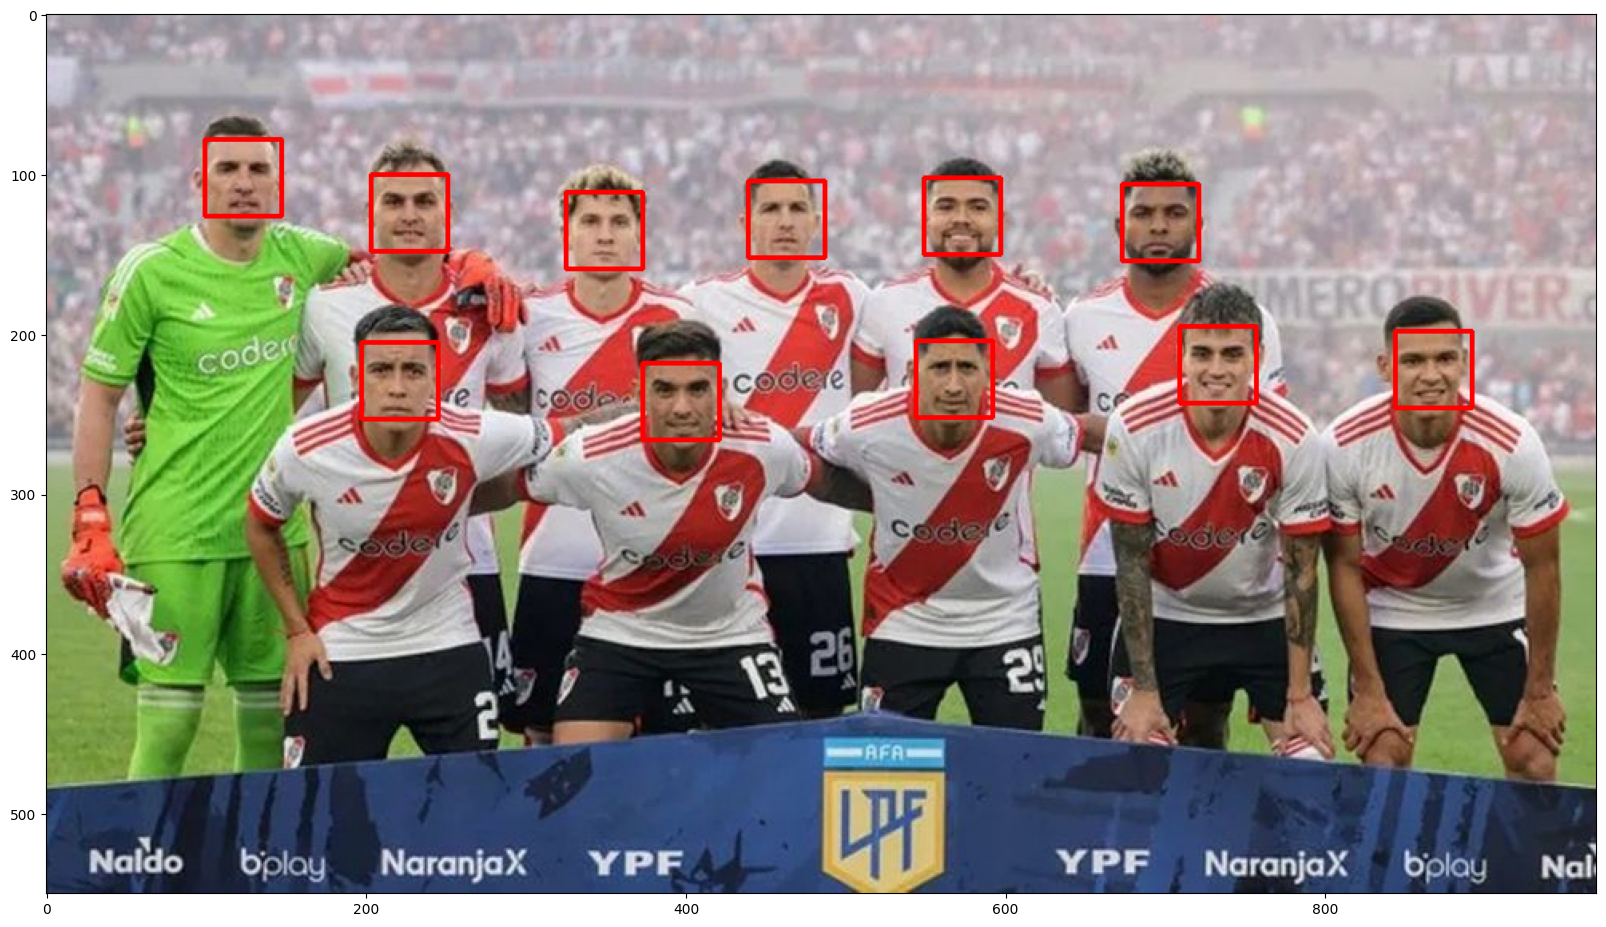

In [16]:
image_with_detections = np.copy(image)

for (x, y, width, height) in faces:
    cv2.rectangle(image_with_detections, (x, y), (x + width, y + height), (255, 0, 0), 2)

plt.figure(figsize=(20, 20))
plt.imshow(image_with_detections)

Se realizaron varias pruebas, y se observaron errores de detección de rostros en imágenes con baja resolución o luminocidad.